In [575]:
from statsmodels.regression import linear_model as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm2
from sklearn.metrics import r2_score
import scipy

In [576]:
#from google.colab import drive
#drive.mount('/content/drive')

In [577]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')
os.listdir();

#**Association of Microstructural white matter and personality traits based on Human connectome project dataset**

In [578]:
csvfile = sorted(os.listdir())[0]
example = pd.read_csv(csvfile, sep =  '\t', index_col = 0)
col =example.columns
example[col[:]].head()

,tract,tags,number of tracts,mean length(mm),span(mm),curl,elongation,diameter(mm),volume(mm^3),trunk volume(mm^3),branch volume(mm^3),total surface area(mm^2),total radius of end regions(mm),total area of end regions(mm^2),irregularity,area of end region 1(mm^2),radius of end region 1(mm),irregularity of end region 1,area of end region 2(mm^2),radius of end region 2(mm),irregularity of end region 2,qa,nqa,dti_fa,md,ad,rd,gfa,iso,rdi,nrdi02L,nrdi04L,nrdi06L,Family_ID,Release,Acquisition,Gender,Gender.1,Age,Age_in_Yrs,...,NEORAW_31,NEORAW_32,NEORAW_33,NEORAW_34,NEORAW_35,NEORAW_36,NEORAW_37,NEORAW_38,NEORAW_39,NEORAW_40,NEORAW_41,NEORAW_42,NEORAW_43,NEORAW_44,NEORAW_45,NEORAW_46,NEORAW_47,NEORAW_48,NEORAW_49,NEORAW_50,NEORAW_51,NEORAW_52,NEORAW_53,NEORAW_54,NEORAW_55,NEORAW_56,NEORAW_57,NEORAW_58,NEORAW_59,NEORAW_60,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
100307,Arcuate_Fasciculus_L,dsi-studio-atk,15410.0,128.685,34.9171,3.68544,7.31386,17.5946,31288.0,27278.0,4010.0,60490.0,25.8050,5974.0,8.50406,4194.0,15.5507,0.181143,1780.0,10.25440,0.185587,0.256980,0.283087,0.393075,0.561520,0.805159,0.439618,0.129344,0.399504,0.379680,0.253480,0.035232,0.0,51488_81352,Q1,Q01,F,1,26-30,27,...,A,A,D,A,A,SD,A,N,D,A,D,D,N,D,D,A,A,D,A,A,D,SA,A,SD,D,D,D,D,SD,A,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
100408,Arcuate_Fasciculus_L,dsi-studio-atk,18813.0,120.789,35.9272,3.36205,6.04143,19.9934,37922.0,37293.0,629.0,61596.0,24.1617,7006.0,8.11874,3796.0,14.0523,0.163425,3210.0,10.10940,0.100022,0.226609,0.277610,0.392587,0.528972,0.760296,0.413328,0.122692,0.373097,0.351102,0.232266,0.031265,0.0,51730_81594,Q3,Q03,M,2,31-35,33,...,A,D,D,A,A,SD,A,SD,D,A,D,N,D,N,D,N,A,D,SA,A,D,A,A,N,D,N,D,A,A,A,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
101107,Arcuate_Fasciculus_L,dsi-studio-atk,16668.0,121.980,32.3953,3.76535,6.26146,19.4810,36358.0,30980.0,5378.0,61361.0,22.9751,6082.0,8.21947,3049.0,13.0326,0.175007,3033.0,9.94253,0.102393,0.279609,0.314404,0.402832,0.532722,0.771320,0.413631,0.126939,0.444134,0.419247,0.278296,0.037951,0.0,51969_81833,S500,Q06,M,2,22-25,22,...,A,N,D,A,SA,SA,N,N,N,SA,SD,N,D,A,SD,N,A,SD,SA,A,SD,SA,SA,A,D,N,SD,A,D,A,6.8,108.79,97.19,1.0,50.1,134.65,131.38,1.84,0.0,1.84
102311,Arcuate_Fasciculus_L,dsi-studio-atk,18673.0,130.061,26.5519,4.89837,7.05933,18.4240,34674.0,23458.0,11216.0,62156.0,25.2128,6711.0,8.25663,3541.0,15.9813,0.226593,3170.0,9.23147,0.084456,0.261298,0.267556,0.400733,0.533603,0.771390,0.414480,0.127738,0.409696,0.389229,0.256815,0.034314,0.0,51679_81543,S500,Q06,F,1,26-30,26,...,D,A,D,A,SA,D,D,SD,D,SA,SD,A,A,D,SD,D,A,D,A,SA,SD,A,A,N,D,D,D,N,A,SA,4.4,122.25,110.45,1.0,52.2,98.31,99.06,1.80,0.0,1.80
102513,Arcuate_Fasciculus_L,dsi-studio-atk,15044.0,123.999,34.9483,3.54807,6.58395,18.8335,34544.0,30769.0,3775.0,62686.0,24.1338,5758.0,8.54417,3177.0,15.0386,0.223638,2581.0,9.09521,0.100690,0.207193,0.272966,0.400221,0.563829,0.814448,0.438605,0.132035,0.313050,0.297991,0.199089,0.027787,0.0,56077_85897,S900,Q10,M,2,26-30,30,...,N,D,N,A,N,D,N,SD,N,A,D,N,A,N,A,D,N,SD,A,N,SD,A,SA,N,D,SD,A,SA,A,SA,5.2,108.79,98.04,2.0,54.3,84.07,82.37,1.92,0.0,1.92


In [579]:
example[col[30:]].head()

,nrdi02L,nrdi04L,nrdi06L,Family_ID,Release,Acquisition,Gender,Gender.1,Age,Age_in_Yrs,Handedness,NEOFAC_A,NEOFAC_O,NEOFAC_C,NEOFAC_N,NEOFAC_E,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,3T_Full_Task_fMRI,3T_tMRI_PctCompl,fMRI_WM_PctCompl,fMRI_Gamb_PctCompl,fMRI_Mot_PctCompl,fMRI_Lang_PctCompl,fMRI_Soc_PctCompl,fMRI_Rel_PctCompl,fMRI_Emo_PctCompl,3T_dMRI_Compl,3T_dMRI_PctCompl,dMRI_3T_ReconVrs,fMRI_3T_ReconVrs,7T_Full_MR_Compl,7T_RS-fMRI_Count,7T_RS-fMRI_PctCompl,7T_Full_Task_fMRI,7T_tMRI_PctCompl,fMRI_Movie_Compl,...,NEORAW_31,NEORAW_32,NEORAW_33,NEORAW_34,NEORAW_35,NEORAW_36,NEORAW_37,NEORAW_38,NEORAW_39,NEORAW_40,NEORAW_41,NEORAW_42,NEORAW_43,NEORAW_44,NEORAW_45,NEORAW_46,NEORAW_47,NEORAW_48,NEORAW_49,NEORAW_50,NEORAW_51,NEORAW_52,NEORAW_53,NEORAW_54,NEORAW_55,NEORAW_56,NEORAW_57,NEORAW_58,NEORAW_59,NEORAW_60,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
100307,0.253480,0.035232,0.0,51488_81352,Q1,Q01,F,1,26-30,27,95,37.0,24.0,35.0,15.0,37.0,1,1,1,4,100.0,1,100.0,100,100.0,100,100.0,100.0,100.0,100,1,100.0,r227,r177,0,0,0,0,0.0,0,...,A,A,D,A,A,SD,A,N,D,A,D,D,N,D,D,A,A,D,A,A,D,SA,A,SD,D,D,D,D,SD,A,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
100408,0.232266,0.031265,0.0,51730_81594,Q3,Q03,M,2,31-35,33,55,33.0,29.0,34.0,15.0,33.0,1,1,1,4,100.0,1,100.0,100,100.0,100,100.0,100.0,100.0,100,1,100.0,r227,r177,0,0,0,0,0.0,0,...,A,D,D,A,A,SD,A,SD,D,A,D,N,D,N,D,N,A,D,SA,A,D,A,A,N,D,N,D,A,A,A,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
101107,0.278296,0.037951,0.0,51969_81833,S500,Q06,M,2,22-25,22,5,28.0,35.0,37.0,12.0,28.0,1,2,2,4,100.0,1,100.0,100,100.0,100,100.0,100.0,100.0,100,1,100.0,r227,r227,0,0,0,0,0.0,0,...,A,N,D,A,SA,SA,N,N,N,SA,SD,N,D,A,SD,N,A,SD,SA,A,SD,SA,SA,A,D,N,SD,A,D,A,6.8,108.79,97.19,1.0,50.1,134.65,131.38,1.84,0.0,1.84
102311,0.256815,0.034314,0.0,51679_81543,S500,Q06,F,1,26-30,26,10,29.0,34.0,38.0,18.0,27.0,1,1,1,4,100.0,1,100.0,100,100.0,100,100.0,100.0,100.0,100,1,100.0,r227,r227,1,4,100,1,100.0,1,...,D,A,D,A,SA,D,D,SD,D,SA,SD,A,A,D,SD,D,A,D,A,SA,SD,A,A,N,D,D,D,N,A,SA,4.4,122.25,110.45,1.0,52.2,98.31,99.06,1.80,0.0,1.80
102513,0.199089,0.027787,0.0,56077_85897,S900,Q10,M,2,26-30,30,50,26.0,39.0,27.0,12.0,27.0,1,2,2,4,100.0,1,100.0,100,100.0,100,100.0,100.0,100.0,100,1,100.0,r227,r227,0,0,0,0,0.0,0,...,N,D,N,A,N,D,N,SD,N,A,D,N,A,N,A,D,N,SD,A,N,SD,A,SA,N,D,SD,A,SA,A,SA,5.2,108.79,98.04,2.0,54.3,84.07,82.37,1.92,0.0,1.92


In [580]:
example[col[40:]].iloc[339]
example["Gender"].iloc[339]

'F'

In [581]:
diff_labels = example.columns[example.columns.tolist().index("qa"):example.columns.tolist().index("rdi") + 1].tolist()
pers_labels = example.columns[example.columns.tolist().index("NEOFAC_A"):example.columns.tolist().index("NEOFAC_E") + 1].tolist()
diff_labels, pers_labels


#same as doing

#diff_labels = ["qa", "nqa", "dti_fa", "md", "ad", "rd", "gfa", "iso","rdi"]
#pers_labels = ["NEOFAC_A","NEOFAC_O", "NEOFAC_C", "NEOFAC_N", "NEOFAC_E"]

(['qa', 'nqa', 'dti_fa', 'md', 'ad', 'rd', 'gfa', 'iso', 'rdi'],
 ['NEOFAC_A', 'NEOFAC_O', 'NEOFAC_C', 'NEOFAC_N', 'NEOFAC_E'])

In [582]:
!pip install pingouin

In [583]:
import pingouin

## Linear regression

In [584]:
pval = []
features = []
coef = []
intercept = []
xs = []
for file in sorted(os.listdir()):
  if "tsv" in file:
    fd = pd.read_csv(file, sep =  '\t', index_col = 0)
    for s in diff_labels:
      for l in pers_labels:
        x = fd[s]
        idx = np.where(np.isnan(x))
        y = fd[l]
        idx2 = np.where(np.isnan(y)) 
        x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
        y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
        x2 = sm2.add_constant(x)
        ls = sm.OLS(y, x2).fit()
        pval.append(ls.pvalues[1])
        coef.append(ls.params[1])
        intercept.append(ls.params[0])
        features.append([file,s,l])
        # here make a dictionary

In [585]:
0.05/68

0.0007352941176470588

In [586]:
files = np.array(features)[np.array(pval) < 0.0007]
len(files)

5

In [587]:
files

array([['Cingulum_Parahippocampal_R.tsv', 'md', 'NEOFAC_A'],
       ['Cingulum_Parahippocampal_R.tsv', 'ad', 'NEOFAC_A'],
       ['Inferior_Cerebellar_Peduncle_L.tsv', 'nqa', 'NEOFAC_N'],
       ['Inferior_Cerebellar_Peduncle_R.tsv', 'nqa', 'NEOFAC_N'],
       ['Uncinate_Fasciculus_R.tsv', 'nqa', 'NEOFAC_N']], dtype='<U42')

In [588]:
id = pval.index(min(pval))
pval[id]

0.00043917757328587966

In [589]:
features[id]

['Cingulum_Parahippocampal_R.tsv', 'ad', 'NEOFAC_A']

In [590]:
files

array([['Cingulum_Parahippocampal_R.tsv', 'md', 'NEOFAC_A'],
       ['Cingulum_Parahippocampal_R.tsv', 'ad', 'NEOFAC_A'],
       ['Inferior_Cerebellar_Peduncle_L.tsv', 'nqa', 'NEOFAC_N'],
       ['Inferior_Cerebellar_Peduncle_R.tsv', 'nqa', 'NEOFAC_N'],
       ['Uncinate_Fasciculus_R.tsv', 'nqa', 'NEOFAC_N']], dtype='<U42')

In [591]:
files[0]

array(['Cingulum_Parahippocampal_R.tsv', 'md', 'NEOFAC_A'], dtype='<U42')

In [594]:
ts = []
for r in range(len(files)):
  f = files[r][0]
  s = files[r][1]
  l = files[r][2]
  if l == "NEOFAC_A":
    l2 = "Agreeableness"
  elif l == "NEOFAC_O":
    l2 = "Openness to experience"
  elif l == "NEOFAC_E":
    l2 = "Extraversion"
  elif l == "NEOFAC_C":
    l2 = "Coscientiousness"
  else:
    l2 = "Neuroticism"
  fd = pd.read_csv(f, sep =  '\t', index_col = 0)
  index = ["Slope coefficient","P-value","R2"]
  variable = "Tract: %s, Variables: %s vs %s" %(files[r][0][:-4],l2, s)
  print(variable)
  if r == 0:
    table1 = pd.DataFrame(columns = index)
    #table2 = pd.DataFrame(columns = index)
  #table = pd.DataFrame( colums = fil)
 
  x = fd[s]
  y = fd[l] 
  idx = np.where(np.isnan(x))
  idx2 = np.where(np.isnan(y))
  y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
  x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
  #x = np.delete(np.array(x),13) # outlier in Cingulum_Parahippocampal_R case
  #y = np.delete(np.array(y),13) #outlier in Cingulum_Parahippocampal_R case
  x = (x- np.mean(x))/np.std(x) # z-score
  y = (y- np.mean(y))/np.std(y) # z-score
  x2 = sm2.add_constant(x)
  ls = sm.OLS(y, x2).fit()
  #print('R2: ', r2_score(y,ls.params[0] + ls.params[1]*x)*100, '%')
  #plt.figure()
  #plt.plot(x, ls.params[0] + ls.params[1]*x, 'r-')
  table1.loc[variable] = [0,0,0]

  table1[index[0]].loc[variable] = "%.2f +- %.2f" %(round(ls.params[1],2),round(ls.bse[1],2))
  table1[index[1]].loc[variable] = round(ls.pvalues[1],4)
  table1[index[2]].loc[variable] = r"%.2f %%" %round(r2_score(y,ls.params[0] + ls.params[1]*x)*100,2)
  #print('Slope coeff and pvalue: ',ls.params[1], ls.pvalues[1])
  #ls.summary()
  #plt.title(f)
  #plt.plot(x,y, 'b.')
  #plt.ylabel(l)
  #plt.xlabel(s)
  #plt.show()
  #print(r"$2 \theta 4$")

Tract: Cingulum_Parahippocampal_R, Variables: Agreeableness vs md
Tract: Cingulum_Parahippocampal_R, Variables: Agreeableness vs ad
Tract: Inferior_Cerebellar_Peduncle_L, Variables: Neuroticism vs nqa
Tract: Inferior_Cerebellar_Peduncle_R, Variables: Neuroticism vs nqa
Tract: Uncinate_Fasciculus_R, Variables: Neuroticism vs nqa


In [595]:
table1

,Slope coefficient,P-value,R2
"Tract: Cingulum_Parahippocampal_R, Variables: Agreeableness vs md",0.16 +- 0.05,0.0006,2.69 %
"Tract: Cingulum_Parahippocampal_R, Variables: Agreeableness vs ad",0.17 +- 0.05,0.0004,2.82 %
"Tract: Inferior_Cerebellar_Peduncle_L, Variables: Neuroticism vs nqa",0.17 +- 0.05,0.0005,2.80 %
"Tract: Inferior_Cerebellar_Peduncle_R, Variables: Neuroticism vs nqa",0.17 +- 0.05,0.0006,2.73 %
"Tract: Uncinate_Fasciculus_R, Variables: Neuroticism vs nqa",0.16 +- 0.05,0.0006,2.71 %


In [596]:
ls.bse

array([0.04745565, 0.04745565])

In [597]:
scipy.stats.spearmanr(x,y)

SpearmanrResult(correlation=0.14456263409954348, pvalue=0.0025376799222337396)

In [598]:
np.corrcoef(x,y)[0,1]

0.16467868589955087

In [599]:
ls.params[1]*np.std(x)/np.std(y)

0.16467868589955087

In [600]:
ls.params[1]*np.std(x)/np.std(y)

0.16467868589955087

## Taking into account some covariates

In [601]:
import pingouin

In [602]:
pvals = []
corrs = []
features = []
for file in sorted(os.listdir()):
  if "tsv" in file:
    #print(file)
    fd = pd.read_csv(file, sep =  '\t', index_col = 0)
    for s in pers_labels:
      for l in diff_labels:
        rs = pingouin.partial_corr(fd,s,l, ["Gender.1", "Age_in_Yrs"])
        corrs.append(rs['r'][0])
        pvals.append(rs['p-val'][0])
        features.append([file,s,l])

In [603]:
pvals.index(min(pvals))
ins = np.argsort(pvals)[:5]

In [604]:
rs

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,434,0.118285,"[0.02, 0.21]",0.013991,0.009416,0.013673,1.244,0.694896


In [605]:
for i in ins:
  print(pvals[i], corrs[i], features[i])

0.001457730280270451 0.1523341212345253 ['Uncinate_Fasciculus_R.tsv', 'NEOFAC_N', 'nqa']
0.002023812740833943 -0.14777896341411367 ['Superior_Longitudinal_Fasciculus1_L.tsv', 'NEOFAC_N', 'rd']
0.002140499833552946 -0.1469880153337125 ['Thalamic_Radiation_Posterior_L.tsv', 'NEOFAC_E', 'nqa']
0.0030927014077332185 0.14169781832492298 ['Superior_Longitudinal_Fasciculus1_L.tsv', 'NEOFAC_N', 'dti_fa']
0.0034450298726943877 0.1401133454404422 ['Optic_Radiation_L.tsv', 'NEOFAC_N', 'nqa']


## Multiple Linear Model

In [606]:
def ordinary_least_squares(Xc, y):

  """ 
  Function that computes OLS analytically

  NB: to take into account also an intercept, a constant vector of 1 needs to be included in Xc.
  then theta_hat will contain both the results for the intercept and the result for the coefficients

  Equivalent to python functions:
  from sklearn.linear_model import LinearRegression
  model = LinearRegression() 
  model.fit(X,y) 
  or
  from statsmodels.regression import linear_model as sm
  sm.OLS(y,Xc).fit()

  Xc (ndarray): design matrix of shape (n_samples, n_regressors)
  y (ndarray): vector of measurements of shape (n_samples)
  Returns:
  ndarray: estimated parameter values of shape (n_regressors)
  """


  # Compute theta_hat using OLS
  theta_hat = np.linalg.inv(Xc.T @ Xc) @ Xc.T @ y

  return theta_hat



In [607]:
from sklearn.linear_model import LinearRegression

Tract Cingulum_Parahippocampal_R.tsv
Tract Cingulum_Parahippocampal_R.tsv
Tract Inferior_Cerebellar_Peduncle_L.tsv
Tract Inferior_Cerebellar_Peduncle_R.tsv
Tract Uncinate_Fasciculus_R.tsv


([<matplotlib.axis.XTick at 0x7fd3e1bef8d0>,
 [Text(0, 0, 'qa'),
  Text(0, 0, 'nqa'),
  Text(0, 0, 'dti_fa'),
  Text(0, 0, 'md'),
  Text(0, 0, 'ad'),
  Text(0, 0, 'rd'),
  Text(0, 0, 'gfa'),
  Text(0, 0, 'iso'),
  Text(0, 0, 'rdi'),
  Text(0, 0, 'Gender.1'),
  Text(0, 0, 'Age_in_Yrs')])

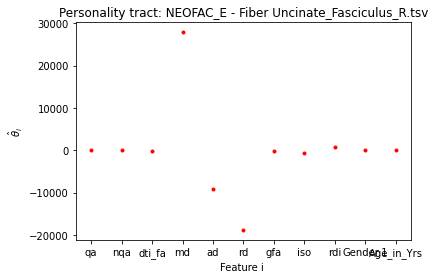

In [608]:

for r in range(len(files)):
  print('Tract', files[r][0])
  f = files[r][0]

  fd = pd.read_csv(f, sep =  '\t', index_col = 0)
  col = diff_labels + ["Gender.1"] + ["Age_in_Yrs"] 
  X = fd[col]
  for t in pers_labels:

    y = fd[t]

    model = LinearRegression()
    idx2 = np.where(np.isnan(y))
    y = np.array(y)
    y = np.delete(y,idx2[0])

    X = np.array(X)
    Xnew = np.empty((X.shape[0]-1,X.shape[1]))
  
    for l in range(len(X[0])):
      Xnew[:,l] = np.delete(X[:,l], idx2[0])

    Xnew2 = sm2.add_constant(Xnew)
    model.fit(Xnew,y)
    theta_hat = ordinary_least_squares(Xnew2, y)

    y_hat = Xnew2 @ theta_hat
    # Compute MSE
    
    #print('Personality tract:', t)
    #print(model.score(Xnew,y)*100)
    #print(f"MSE = {np.mean((y - y_hat)**2):.2f}") 
plt.figure()
plt.title('Personality tract: %s - Fiber %s' %(t,f))
plt.plot(model.coef_, 'r.')
plt.xlabel('Feature i ')
plt.ylabel(r'$\hat{\theta}_i$')
plt.xticks(np.arange(0,len(col),1), labels = col)


In [609]:
print(col)

['qa', 'nqa', 'dti_fa', 'md', 'ad', 'rd', 'gfa', 'iso', 'rdi', 'Gender.1', 'Age_in_Yrs']


In [610]:
for r in np.argsort(np.abs(model.coef_))[::-1][:3]:
  print(col[r])

md
rd
ad


qa nqa


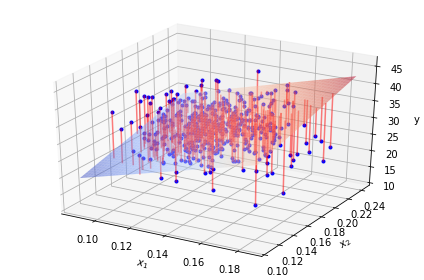

In [611]:
# contigous indexes
idx1 = 0
idx2 = 1
print(col[idx1], col[idx2])
theta_hat = ordinary_least_squares(Xnew2, y)
x_pred = np.linspace(min(Xnew2[:,1+idx1]),max(Xnew2[:,1+idx1]), 50)   
y_pred = np.linspace(min(Xnew2[:,1+idx2]),max(Xnew2[:,1+idx2]), 50)  
xx, yy = np.meshgrid(x_pred, y_pred)
theta_hat = ordinary_least_squares(Xnew2[:,1+idx1:2+idx2], y)
y_hat_grid = np.array([xx.flatten(), yy.flatten()]).T @ theta_hat
ypred = Xnew2[:,1+idx1:1+idx2+1] @ theta_hat
y_hat_grid = y_hat_grid.reshape((50, 50))
model_viz = np.array([xx.flatten(), yy.flatten()]).T
from sklearn import linear_model
ols = linear_model.LinearRegression()
model = ols.fit(Xnew[:,idx1:idx2+1], y)
ax = plt.subplot(projection='3d')

ax.plot(Xnew2[:, 1+idx1], Xnew2[:, 1+idx2], y, 'b.')
ax.plot_surface(xx, yy, y_hat_grid.reshape(50,50), linewidth=0, alpha=0.5, color='C1',
                cmap=plt.get_cmap('coolwarm'))

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='y'

)
for i in range(len(Xnew2)):
  ax.plot((Xnew2[i, 1+idx1], Xnew2[i, 1+idx1]),
          (Xnew2[i, 1+idx2], Xnew2[i, 1+ idx2]),
          (y[i], ypred[i]),
          'r-', alpha=.5)

plt.tight_layout()


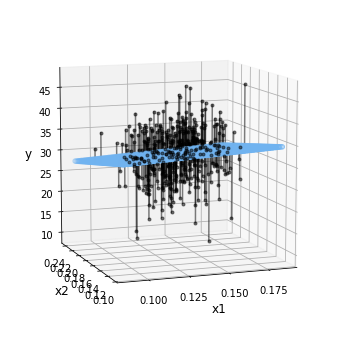

In [612]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

x1 = Xnew[:,0]
x2 = Xnew[:,1]
x_pred = np.linspace(min(x1),max(x1), 50)   
y_pred = np.linspace(min(x2),max(x2), 50) 
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
Y = y
z = Y
from sklearn import linear_model
ols = linear_model.LinearRegression()
model = ols.fit(Xnew[:,:2], Y)
predicted = model.predict(model_viz)
ypred = model.predict(Xnew[:,:2])
fig = plt.figure(figsize = (20,6))
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(x1,x2, z, color='k', zorder=15, linestyle='none', marker='.', alpha=0.5)
ax1.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax1.locator_params(nbins=4, axis='x')
ax1.set_xlabel('x1', fontsize=12)
ax1.set_ylabel('x2', fontsize=12)
ax1.set_zlabel('y', fontsize=12)
ax1.locator_params(nbins=5, axis='x')

for i in range(len(Xnew2)):
  ax1.plot((Xnew2[i, 1+idx1], Xnew2[i, 1+idx1]),
          (Xnew2[i, 1+idx2], Xnew2[i, 1+ idx2]),
          (y[i], ypred[i]),
          'k-', alpha=.5)
ax1.view_init(elev=10, azim=250)

## Replicating the method on shape features (e. g. 'span(mm)', 'curl', 'elongation', 'diameter(mm)', 'volume(mm^3)', 'trunk volume(mm^3)', 'branch volume(mm^3)', 'total surface area(mm^2)', 'total radius of end regions(mm) etc...)

In [613]:
shape_labels = fd.columns[fd.columns.tolist().index("span(mm)"):fd.columns.tolist().index('irregularity of end region 2')+1]

In [614]:
shape_labels

Index(['span(mm)', 'curl', 'elongation', 'diameter(mm)', 'volume(mm^3)',
       'trunk volume(mm^3)', 'branch volume(mm^3)', 'total surface area(mm^2)',
       'total radius of end regions(mm)', 'total area of end regions(mm^2)',
       'irregularity', 'area of end region 1(mm^2)',
       'radius of end region 1(mm)', 'irregularity of end region 1',
       'area of end region 2(mm^2)', 'radius of end region 2(mm)',
       'irregularity of end region 2'],
      dtype='object')

In [615]:
pval = []
features = []
coef = []
intercept = []
xs = []
for file in sorted(os.listdir()):
  if "tsv" in file:
    #print(file)
    fd = pd.read_csv(file, sep =  '\t', index_col = 0)
    for s in shape_labels:
      for l in pers_labels:
        x = fd[s]
        idx = np.where(np.isnan(x))
        y = fd[l]
        idx2 = np.where(np.isnan(y)) 
        x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
        y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
        x2 = sm2.add_constant(x)
        ls = sm.OLS(y, x2).fit()
        pval.append(ls.pvalues[1])
        coef.append(ls.params[1])
        intercept.append(ls.params[0])
        xs.append(x)
        features.append([file,s,l])

In [616]:
files = np.array(features)[np.array(pval) < 0.0007]
len(files)

30

In [617]:
id = pval.index(min(pval))
pval[id]

7.852132837753916e-06

In [620]:
files

array([['Cingulum_Frontal_Parietal_R.tsv', 'area of end region 1(mm^2)',
        'NEOFAC_O'],
       ['Corticobulbar_Tract_R.tsv', 'total area of end regions(mm^2)',
        'NEOFAC_A'],
       ['Corticostriatal_Tract_Anterior_L.tsv',
        'area of end region 1(mm^2)', 'NEOFAC_A'],
       ['Corticostriatal_Tract_Anterior_R.tsv', 'trunk volume(mm^3)',
        'NEOFAC_A'],
       ['Corticostriatal_Tract_Anterior_R.tsv',
        'total area of end regions(mm^2)', 'NEOFAC_A'],
       ['Corticostriatal_Tract_Posterior_R.tsv', 'diameter(mm)',
        'NEOFAC_O'],
       ['Corticostriatal_Tract_Posterior_R.tsv',
        'total surface area(mm^2)', 'NEOFAC_O'],
       ['Corticostriatal_Tract_Posterior_R.tsv',
        'total area of end regions(mm^2)', 'NEOFAC_O'],
       ['Corticostriatal_Tract_Posterior_R.tsv', 'irregularity',
        'NEOFAC_O'],
       ['Corticostriatal_Tract_Posterior_R.tsv',
        'area of end region 1(mm^2)', 'NEOFAC_O'],
       ['Corticostriatal_Tract_Superior_R.ts

In [621]:
ts = []
for r in range(len(files)):


  f = files[r][0]
  s = files[r][1]
  l = files[r][2]
  fd = pd.read_csv(f, sep =  '\t', index_col = 0)
  x = fd[s]
  y = fd[l] 


  index = ["Slope coefficient","P-value","R2"]


  if l == "NEOFAC_A":
    l2 = "Agreeableness"
  elif l == "NEOFAC_O":
    l2 = "Openness to experience"
  elif l == "NEOFAC_E":
    l2 = "Extraversion"
  elif l == "NEOFAC_C":
    l2 = "Coscientiousness"
  else:
    l2 = "Neuroticism"

  variable = "Tract: %s, Variables: %s vs %s" %(files[r][0][:-4],l2, s)

  if r == 0:
    table1 = pd.DataFrame(columns = index)

  idx = np.where(np.isnan(x))
  idx2 = np.where(np.isnan(y))
  
  
  y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
  x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
  #x = np.delete(np.array(x),13) # outlier in Cingulum_Parahippocampal_R case
  #y = np.delete(np.array(y),13) #outlier in Cingulum_Parahippocampal_R case
  x = (x- np.mean(x))/np.std(x) # z-score
  y = (y- np.mean(y))/np.std(y) # z-score
  x2 = sm2.add_constant(x)
  ls = sm.OLS(y, x2).fit()
  #print('R2: ', r2_score(y,ls.params[0] + ls.params[1]*x)*100, '%')
  print("Adding a row", r)
  table1.loc[variable] = [0,0,0]

  table1[index[0]].loc[variable] = "%.2f +- %.2f" %(round(ls.params[1],2),round(ls.bse[1],2))
  table1[index[1]].loc[variable] = round(ls.pvalues[1],4)
  table1[index[2]].loc[variable] = r"%.2f %%" %round(r2_score(y,ls.params[0] + ls.params[1]*x)*100,2)
  
  """
  plt.figure()
  plt.plot(x, ls.params[0] + ls.params[1]*x, 'r-')
  
  print('Slope coeff and pvalue: ',ls.params[1], ls.pvalues[1])
  ls.summary()
  plt.title(f)
  plt.plot(x,y, 'b.')
  plt.ylabel(l)
  plt.xlabel(s)
  plt.show()
  """

Adding a row 0
Adding a row 1
Adding a row 2
Adding a row 3
Adding a row 4
Adding a row 5
Adding a row 6
Adding a row 7
Adding a row 8
Adding a row 9
Adding a row 10
Adding a row 11
Adding a row 12
Adding a row 13
Adding a row 14
Adding a row 15
Adding a row 16
Adding a row 17
Adding a row 18
Adding a row 19
Adding a row 20
Adding a row 21
Adding a row 22
Adding a row 23
Adding a row 24
Adding a row 25
Adding a row 26
Adding a row 27
Adding a row 28
Adding a row 29


In [622]:
len(files)

30

In [623]:
table1.head(40)

,Slope coefficient,P-value,R2
"Tract: Cingulum_Frontal_Parietal_R, Variables: Openness to experience vs area of end region 1(mm^2)",0.17 +- 0.05,0.0005,2.80 %
"Tract: Corticobulbar_Tract_R, Variables: Agreeableness vs total area of end regions(mm^2)",-0.18 +- 0.05,0.0002,3.24 %
"Tract: Corticostriatal_Tract_Anterior_L, Variables: Agreeableness vs area of end region 1(mm^2)",-0.16 +- 0.05,0.0006,2.68 %
"Tract: Corticostriatal_Tract_Anterior_R, Variables: Agreeableness vs trunk volume(mm^3)",-0.18 +- 0.05,0.0001,3.32 %
"Tract: Corticostriatal_Tract_Anterior_R, Variables: Agreeableness vs total area of end regions(mm^2)",-0.16 +- 0.05,0.0007,2.64 %
"Tract: Corticostriatal_Tract_Posterior_R, Variables: Openness to experience vs diameter(mm)",0.16 +- 0.05,0.0006,2.68 %
"Tract: Corticostriatal_Tract_Posterior_R, Variables: Openness to experience vs total surface area(mm^2)",0.17 +- 0.05,0.0003,2.93 %
"Tract: Corticostriatal_Tract_Posterior_R, Variables: Openness to experience vs total area of end regions(mm^2)",0.16 +- 0.05,0.0007,2.65 %
"Tract: Corticostriatal_Tract_Posterior_R, Variables: Openness to experience vs irregularity",0.16 +- 0.05,0.0006,2.67 %
"Tract: Corticostriatal_Tract_Posterior_R, Variables: Openness to experience vs area of end region 1(mm^2)",0.17 +- 0.05,0.0003,3.06 %


Text(0, 0.5, '$\\hat{\\theta}_i$')

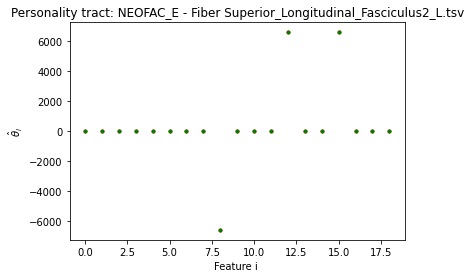

In [624]:

for r in range(len(files)):
  #print('Tract', files[r][0])
  f = files[r][0]
  fd = pd.read_csv(f, sep =  '\t', index_col = 0)
  col = shape_labels.tolist() + ["Gender.1"] + ["Age_in_Yrs"]

  X = fd[col]
  for t in pers_labels:
    
    y = fd[t]

    model = LinearRegression()
    idx2 = np.where(np.isnan(y))

    y = np.array(y)
    y = np.delete(y,idx2[0])

    X = np.array(X)
    Xnew = np.empty((X.shape[0]-1,X.shape[1]))

    for l in range(len(X[0])):
      Xnew[:,l] = np.delete(X[:,l], idx2[0])
  
    Xnew2 = sm2.add_constant(Xnew)

    model.fit(Xnew,y)

    theta_hat = ordinary_least_squares(Xnew2,y)

    y_hat = Xnew2 @ theta_hat
    ols = sm.OLS(y, Xnew2).fit()

    
    
    #print('Personality tract:', t)
    #print(model.score(Xnew,y)*100)
    #print(f"MSE = {np.mean((y - y_hat)**2):.2f}") 


plt.figure()
plt.title('Personality tract: %s - Fiber %s' %(t,f))
plt.plot(model.coef_, 'r.')
plt.plot(ols.params[1:], 'g.')
#plt.xticks(np.arange(0,len(col),1), labels = col)
plt.xlabel('Feature i ')
plt.ylabel(r'$\hat{\theta}_i$')

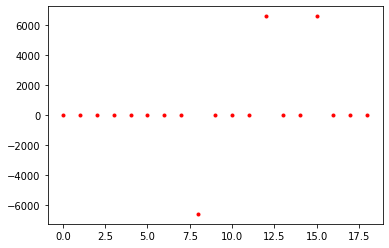

In [625]:
plt.plot(model.coef_, 'r.')

In [626]:
for r in np.argsort(np.abs(model.coef_))[::-1][:3]:
          print(col[r])

radius of end region 1(mm)
total radius of end regions(mm)
radius of end region 2(mm)


## Females

In [627]:
pval = []
features = []
coef = []
intercept = []
xs = []
for file in sorted(os.listdir()):
  if "tsv" in file:
    fd = pd.read_csv(file, sep =  '\t', index_col = 0)
    males = []
    females = []  
    gender = np.array(fd["Gender.1"])
    for r in range(len(gender)):
      if gender[r] == 1:
        females.append(fd.index[r])


    #for r in range(len(gender)):
     # if gender[r] == 2:
      #  males.append(fd.index[r])


    #maledf = df.loc[males]
    femaledf = fd.loc[females]
    #print(len(femaledf))
    for s in diff_labels:
      for l in pers_labels:
        x = femaledf[s]
        idx = np.where(np.isnan(x))
        y = femaledf[l]
        idx2 = np.where(np.isnan(y)) 
        x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
        y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
        x2 = sm2.add_constant(x)
        ls = sm.OLS(y, x2).fit()
        pval.append(ls.pvalues[1])
        coef.append(ls.params[1])
        intercept.append(ls.params[0])
        xs.append(x)
        features.append([file,s,l])

In [628]:
files = np.array(features)[np.array(pval) < 0.0007]
files
#p = np.array(pval)[np.array(pval) < 0.005]

array([['Corticopontine_Tract_Occipital_L.tsv', 'dti_fa', 'NEOFAC_O']],
      dtype='<U42')

In [631]:
files = np.array(features)[np.array(pval) < 0.007]
files
#p = np.array(pval)[np.array(pval) < 0.005]

array([['Cingulum_Parahippocampal_R.tsv', 'gfa', 'NEOFAC_O'],
       ['Corpus_Callosum_Tapetum.tsv', 'dti_fa', 'NEOFAC_O'],
       ['Corticopontine_Tract_Occipital_L.tsv', 'dti_fa', 'NEOFAC_O'],
       ['Corticopontine_Tract_Occipital_L.tsv', 'gfa', 'NEOFAC_O'],
       ['Corticopontine_Tract_Parietal_L.tsv', 'dti_fa', 'NEOFAC_O'],
       ['Corticopontine_Tract_Parietal_L.tsv', 'gfa', 'NEOFAC_O'],
       ['Corticostriatal_Tract_Posterior_R.tsv', 'gfa', 'NEOFAC_O'],
       ['Inferior_Fronto_Occipital_Fasciculus_L.tsv', 'dti_fa',
        'NEOFAC_O'],
       ['Middle_Cerebellar_Peduncle.tsv', 'dti_fa', 'NEOFAC_O'],
       ['Middle_Cerebellar_Peduncle.tsv', 'gfa', 'NEOFAC_O'],
       ['Superior_Longitudinal_Fasciculus1_L.tsv', 'ad', 'NEOFAC_O'],
       ['Superior_Longitudinal_Fasciculus1_R.tsv', 'dti_fa', 'NEOFAC_O'],
       ['Superior_Longitudinal_Fasciculus3_L.tsv', 'ad', 'NEOFAC_O'],
       ['Uncinate_Fasciculus_R.tsv', 'nqa', 'NEOFAC_N'],
       ['Vertical_Occipital_Fasciculus_R.tsv', '

In [632]:
for r in range(len(files)):
  f = files[r][0]
  fd = pd.read_csv(f, sep =  '\t', index_col = 0)
  males = []
  females = []  
  gender = np.array(fd["Gender.1"])
  for h in range(len(gender)):
    if gender[h] == 1:
      females.append(fd.index[h])


  #for r in range(len(gender)):
    # if gender[r] == 2:
    #  males.append(fd.index[r])


  #maledf = df.loc[males]
  
  femaledf = fd.loc[females]

  s = files[r][1]
  l = files[r][2]


  
  index = ["Slope coefficient","P-value","R2"]


  if l == "NEOFAC_A":
    l2 = "Agreeableness"
  elif l == "NEOFAC_O":
    l2 = "Openness to experience"
  elif l == "NEOFAC_E":
    l2 = "Extraversion"
  elif l == "NEOFAC_C":
    l2 = "Coscientiousness"
  else:
    l2 = "Neuroticism"

  variable = "Tract: %s, Variables: %s vs %s" %(files[r][0][:-4],l2, s)

  if r == 0:
    table1 = pd.DataFrame(columns = index)

  x = femaledf[s]
  y = femaledf[l] 
  idx = np.where(np.isnan(x))
  idx2 = np.where(np.isnan(y))
  y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
  x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
  #x = np.delete(np.array(x),13) # outlier in Cingulum_Parahippocampal_R case
  #y = np.delete(np.array(y),13) #outlier in Cingulum_Parahippocampal_R case
  x = (x- np.mean(x))/np.std(x) # z-score
  y = (y- np.mean(y))/np.std(y) # z-score
  x2 = sm2.add_constant(x)
  ls = sm.OLS(y, x2).fit()


  table1.loc[variable] = [0,0,0]

  table1[index[0]].loc[variable] = "%.2f +- %.2f" %(round(ls.params[1],2),round(ls.bse[1],2))
  table1[index[1]].loc[variable] = round(ls.pvalues[1],4)
  table1[index[2]].loc[variable] = r"%.2f %%" %round(r2_score(y,ls.params[0] + ls.params[1]*x)*100,2)
  
  """
  print('R2: ', r2_score(y,ls.params[0] + ls.params[1]*x)*100, '%')
  plt.figure()
  plt.plot(x, ls.params[0] + ls.params[1]*x, 'r-')
  
  print('Slope coeff and pvalue: ',ls.params[1], ls.pvalues[1])
  ls.summary()
  plt.title(f)
  plt.plot(x,y, 'b.')
  plt.ylabel(l)
  plt.xlabel(s)
  plt.show()
  """

In [633]:
table1

,Slope coefficient,P-value,R2
"Tract: Cingulum_Parahippocampal_R, Variables: Openness to experience vs gfa",0.18 +- 0.06,0.0053,3.20 %
"Tract: Corpus_Callosum_Tapetum, Variables: Openness to experience vs dti_fa",0.21 +- 0.07,0.0028,4.34 %
"Tract: Corticopontine_Tract_Occipital_L, Variables: Openness to experience vs dti_fa",0.24 +- 0.07,0.0005,5.69 %
"Tract: Corticopontine_Tract_Occipital_L, Variables: Openness to experience vs gfa",0.20 +- 0.07,0.0029,4.19 %
"Tract: Corticopontine_Tract_Parietal_L, Variables: Openness to experience vs dti_fa",0.19 +- 0.06,0.0032,3.56 %
"Tract: Corticopontine_Tract_Parietal_L, Variables: Openness to experience vs gfa",0.18 +- 0.06,0.004,3.40 %
"Tract: Corticostriatal_Tract_Posterior_R, Variables: Openness to experience vs gfa",0.18 +- 0.06,0.0055,3.17 %
"Tract: Inferior_Fronto_Occipital_Fasciculus_L, Variables: Openness to experience vs dti_fa",0.19 +- 0.06,0.0029,3.64 %
"Tract: Middle_Cerebellar_Peduncle, Variables: Openness to experience vs dti_fa",0.18 +- 0.06,0.0053,3.20 %
"Tract: Middle_Cerebellar_Peduncle, Variables: Openness to experience vs gfa",0.18 +- 0.06,0.0059,3.12 %


In [634]:
fd["Gender.1"]

100307    1
100408    2
101107    2
102311    1
102513    2
         ..
971160    2
973770    2
987983    1
990366    2
995174    2
Name: Gender.1, Length: 435, dtype: int64

Text(0, 0.5, '$\\hat{\\theta}_i$')

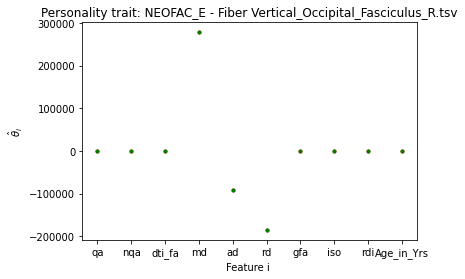

In [635]:
for r in range(len(files)):


  f = files[r][0]
  fd = pd.read_csv(f, sep =  '\t', index_col = 0)

  #males = []
  females = []  
  gender = np.array(fd["Gender.1"])
  for g in range(len(gender)):

    if gender[g] == 1:
      females.append(fd.index[g])


  #for r in range(len(gender)):
    # if gender[r] == 2:
    #  males.append(fd.index[r])
    
  
  col = diff_labels + ["Age_in_Yrs"]
  femaledf = fd.loc[females]
  X = femaledf[col]
  for t in pers_labels:
    
    
    y = femaledf[t]

    model = LinearRegression()


    idx2 = np.where(np.isnan(y))

    y = np.array(y)
    if np.any(idx2):
      y = np.delete(y,idx2[0])

    X = np.array(X)
    Xnew = np.copy(X)
    #print(X.shape, Xnew.shape)
    if np.any(idx2):
    
      Xnew = np.empty((X.shape[0]-1, X.shape[1]))
      for l in range(len(X[0])):
        Xnew[:,l] = np.delete(X[:,l], idx2[0])
    else:
      Xnew = X.copy()

    Xnew2 = sm2.add_constant(Xnew)

    model.fit(Xnew,y)

    theta_hat = ordinary_least_squares(Xnew2,y)

    y_hat = Xnew2 @ theta_hat
    ols = sm.OLS(y, Xnew2).fit()

      
        
        #print('Personality trait:', t)
        #print(model.score(Xnew,y)*100)
        #print(f"MSE = {np.mean((y - y_hat)**2):.2f}") 


plt.figure()
plt.title('Personality trait: %s - Fiber %s' %(t,f))
plt.plot(model.coef_, 'r.')
plt.plot(ols.params[1:], 'g.')
plt.xticks(np.arange(0,len(col),1), labels = col)
plt.xlabel('Feature i ')
plt.ylabel(r'$\hat{\theta}_i$')

In [636]:
np.any([])

False

## Males

In [637]:
np.array(maledf).shape

(192, 618)

In [638]:
len(femaledf)

243

In [639]:
pval = []
features = []
coef = []
intercept = []
xs = []
for file in sorted(os.listdir()):
  if "tsv" in file:
   
    fd = pd.read_csv(file, sep =  '\t', index_col = 0)
    males = []
    females = []  
    gender = np.array(fd["Gender.1"])
    #for r in range(len(gender)):
      #if gender[r] == 1:
        #females.append(fd.index[r])


    for r in range(len(gender)):
      if gender[r] == 2:
        males.append(fd.index[r])


    maledf = fd.loc[males]
    #femaledf = df.loc[females]
    for s in diff_labels:
      for l in pers_labels:
        x = maledf[s]
        idx = np.where(np.isnan(x))
        y = maledf[l]
        idx2 = np.where(np.isnan(y)) 
        x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
        y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
        x2 = sm2.add_constant(x)
        ls = sm.OLS(y, x2).fit()
        pval.append(ls.pvalues[1])
        coef.append(ls.params[1])
        intercept.append(ls.params[0])
        xs.append(x)
        features.append([file,s,l])

In [640]:
filess = np.array(features)[np.array(pval) < 0.0005]
filess

array([], shape=(0, 3), dtype='<U42')

In [643]:
files = np.array(features)[np.array(pval) < 0.007]
files

array([['Cingulum_Rarolfactory_L.tsv', 'md', 'NEOFAC_N'],
       ['Cingulum_Rarolfactory_L.tsv', 'rd', 'NEOFAC_N'],
       ['Corticopontine_Tract_Occipital_R.tsv', 'dti_fa', 'NEOFAC_N'],
       ['Inferior_Longitudinal_Fasciculus_R.tsv', 'rd', 'NEOFAC_C'],
       ['Superior_Longitudinal_Fasciculus1_L.tsv', 'md', 'NEOFAC_N'],
       ['Superior_Longitudinal_Fasciculus1_L.tsv', 'rd', 'NEOFAC_N']],
      dtype='<U42')

In [644]:
for r in range(len(files)):
  f = files[r][0]
  fd = pd.read_csv(f, sep =  '\t', index_col = 0)
  males = []
  females = []  
  gender = np.array(fd["Gender.1"])
  for h in range(len(gender)):
    if gender[h] == 2:
      males.append(fd.index[h])


  #for r in range(len(gender)):
    # if gender[r] == 2:
    #  males.append(fd.index[r])


  #maledf = df.loc[males]
  maledf = fd.loc[males]

  s = files[r][1]
  l = files[r][2]



  index = ["Slope coefficient","P-value","R2"]


  if l == "NEOFAC_A":
    l2 = "Agreeableness"
  elif l == "NEOFAC_O":
    l2 = "Openness to experience"
  elif l == "NEOFAC_E":
    l2 = "Extraversion"
  elif l == "NEOFAC_C":
    l2 = "Coscientiousness"
  else:
    l2 = "Neuroticism"

  variable = "Tract: %s, Variables: %s vs %s" %(files[r][0][:-4],l2, s)

  if r == 0:
    table1 = pd.DataFrame(columns = index)

  x = maledf[s]
  y = maledf[l] 
  idx = np.where(np.isnan(x))
  idx2 = np.where(np.isnan(y))
  y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
  x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
  #x = np.delete(np.array(x),13) # outlier in Cingulum_Parahippocampal_R case
  #y = np.delete(np.array(y),13) #outlier in Cingulum_Parahippocampal_R case
  x = (x- np.mean(x))/np.std(x) # z-score
  y = (y- np.mean(y))/np.std(y) # z-score
  x2 = sm2.add_constant(x)
  ls = sm.OLS(y, x2).fit()


  table1.loc[variable] = [0,0,0]

  table1[index[0]].loc[variable] = "%.2f +- %.2f" %(round(ls.params[1],2),round(ls.bse[1],2))
  table1[index[1]].loc[variable] = round(ls.pvalues[1],4)
  table1[index[2]].loc[variable] = r"%.2f %%" %round(r2_score(y,ls.params[0] + ls.params[1]*x)*100,2)
  """
  print('R2: ', r2_score(y,ls.params[0] + ls.params[1]*x)*100, '%')
  plt.figure()
  plt.plot(x, ls.params[0] + ls.params[1]*x, 'r-')
  
  print('Slope coeff and pvalue: ',ls.params[1], ls.pvalues[1])
  ls.summary()
  plt.title(f)
  plt.plot(x,y, 'b.')
  plt.ylabel(l)
  plt.xlabel(s)
  plt.show()
  """

In [645]:
table1

,Slope coefficient,P-value,R2
"Tract: Cingulum_Rarolfactory_L, Variables: Neuroticism vs md",-0.22 +- 0.07,0.0022,4.82 %
"Tract: Cingulum_Rarolfactory_L, Variables: Neuroticism vs rd",-0.21 +- 0.07,0.0034,4.42 %
"Tract: Corticopontine_Tract_Occipital_R, Variables: Neuroticism vs dti_fa",0.22 +- 0.08,0.0067,4.80 %
"Tract: Inferior_Longitudinal_Fasciculus_R, Variables: Coscientiousness vs rd",0.19 +- 0.07,0.0067,3.80 %
"Tract: Superior_Longitudinal_Fasciculus1_L, Variables: Neuroticism vs md",-0.20 +- 0.07,0.0065,3.83 %
"Tract: Superior_Longitudinal_Fasciculus1_L, Variables: Neuroticism vs rd",-0.20 +- 0.07,0.0047,4.12 %


435
435
351
435
435
435


Text(0, 0.5, '$\\hat{\\theta}_i$')

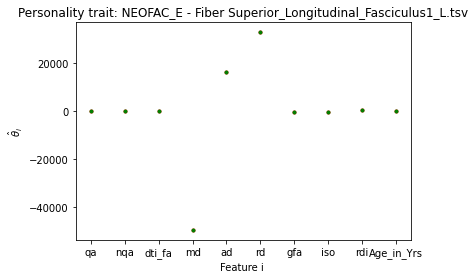

In [646]:
for r in range(len(files)):
  
  


  f = files[r][0]
  fd = pd.read_csv(f, sep =  '\t', index_col = 0)

  males = []
  gender = np.array(fd["Gender.1"])
  print(len(gender))

  for g in range(len(np.array(gender))):
  
    if gender[g] == 2:
      males.append(fd.index[g])

  col = diff_labels + ["Age_in_Yrs"]
  maledf = fd.loc[males]
  X = maledf[col]
  for t in pers_labels:
    y = maledf[t]
    model = LinearRegression()
    idx2 = np.where(np.isnan(y))
    y = np.array(y)
    X = np.array(X)
    Xnew = np.copy(X)
    #print(X.shape, Xnew.shape)
    

    Xnew2 = sm2.add_constant(Xnew)

    model.fit(Xnew,y)

    theta_hat = ordinary_least_squares(Xnew2,y)

    y_hat = Xnew2 @ theta_hat
    ols = sm.OLS(y, Xnew2).fit()

      
        
        #print('Personality trait:', t)
        #print(model.score(Xnew,y)*100)
        #print(f"MSE = {np.mean((y - y_hat)**2):.2f}") 


plt.figure()
plt.title('Personality trait: %s - Fiber %s' %(t,f))
plt.plot(model.coef_, 'r.')
plt.plot(ols.params[1:], 'g.')
plt.xticks(np.arange(0,len(col),1), labels = col)
plt.xlabel('Feature i ')
plt.ylabel(r'$\hat{\theta}_i$')

In [647]:
len(files)


6

In [648]:
pval[2862]

0.43352000149557446

In [649]:
features[1730]

['Inferior_Cerebellar_Peduncle_L.tsv', 'ad', 'NEOFAC_A']

In [650]:
files;

In [651]:
maledf.iloc[339][45:]

IndexError: ignored